In [4]:
import pandas as pd
import glob

# Define the directory where your CSV files are stored
csv_directory = "./PassengerVehicle_Stats/"  # Replace with the directory path

# Use glob to load all CSV files in the directory into a list
csv_files = glob.glob(csv_directory + "*.csv")
try:
        # Check if we have 9 files and load them into a list
    if len(csv_files) == 9:
        print(f"Found {len(csv_files)} CSV files.")
        
        # Load all CSV files into a list of DataFrames
        csv_data_list = [pd.read_csv(file) for file in csv_files]

        # Concatenate the list of DataFrames into a single DataFrame
        vehicles_df = pd.concat(csv_data_list, ignore_index=True)

        # Optionally, save the combined DataFrame to a new CSV file
        vehicles_df.to_csv("combined_vehicles_data.csv", index=False)
        print("Combined DataFrame saved to 'combined_vehicles_data.csv'.")
    else:
        print(f"Expected 9 CSV files, but found {len(csv_files)}. Please check your directory.")

except Exception as e:
    print(f"Error occurred: {e}")

ModuleNotFoundError: No module named 'pandas'

In [7]:
#Renaming the first column
vehicles_df.rename(columns={"Unnamed: 0": "Index"}, inplace=True)
print(vehicles_df.columns)

# Save the updated DataFrame to a CSV file
vehicles_df.to_csv("combined_vehicles_data.csv", index=False)

print("File saved as 'combined_vehicles_data.csv'")

Index(['Index', 'Public Vehicle Number', 'Status', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Model Year', 'Vehicle Color',
       'Vehicle Fuel Source', 'Wheelchair Accessible', 'Company Name',
       'Address', 'City', 'State', 'ZIP Code', 'Taxi Affiliation',
       'Taxi Medallion License Management ', 'Record ID'],
      dtype='object')
File saved as 'combined_vehicles_data.csv'


In [3]:
#Data types of the variables
print(vehicles_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16602 entries, 0 to 16601
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Index                               16602 non-null  int64  
 1   Public Vehicle Number               16602 non-null  int64  
 2   Status                              16602 non-null  object 
 3   Vehicle Make                        14685 non-null  object 
 4   Vehicle Model                       14639 non-null  object 
 5   Vehicle Model Year                  14660 non-null  float64
 6   Vehicle Color                       14616 non-null  object 
 7   Vehicle Fuel Source                 16602 non-null  object 
 8   Wheelchair Accessible               16602 non-null  object 
 9   Company Name                        16602 non-null  object 
 10  Address                             14816 non-null  object 
 11  City                                14816

In [4]:
#First few records of the vehicles data frame
print(vehicles_df.head())

   Index  Public Vehicle Number    Status Vehicle Make Vehicle Model  \
0   1286                  12009  RESERVED    CHEVROLET       EXPRESS   
1   2095                  12248  INACTIVE     MERCEDES      SPRINTER   
2   7950                  13527  INACTIVE     VAN HOOL         TD925   
3   8700                  12248  INACTIVE     MERCEDES      SPRINTER   
4   9359                  13528  INACTIVE     VAN HOOL         TD925   

   Vehicle Model Year Vehicle Color Vehicle Fuel Source Wheelchair Accessible  \
0              2014.0         BLACK          Bio-Diesel                     N   
1              2010.0        SILVER          Bio-Diesel                     N   
2              2008.0           RED          Bio-Diesel                     N   
3              2010.0        SILVER          Bio-Diesel                     N   
4              2008.0           RED          Bio-Diesel                     N   

                              Company Name                 Address     City  \
0

In [5]:
# All the variables consisit with qualitative nature
#Identifying the mode of variables
qualitative_columns = vehicles_df.select_dtypes(include=['object', 'category']).columns
mode_values = vehicles_df[qualitative_columns.drop('Record ID')].mode()
print("Mode values for each qualitative variable:")
print(mode_values)

Mode values for each qualitative variable:
   Status Vehicle Make Vehicle Model Vehicle Color Vehicle Fuel Source  \
0  ACTIVE       TOYOTA         CAMRY         WHITE            Gasoline   

  Wheelchair Accessible          Company Name                 Address  \
0                     N  CITY OF CHICAGO BACP  3800 N. MILWAUKEE AVE.   

      City State Taxi Affiliation Taxi Medallion License Management   
0  CHICAGO    IL   DIS-AFFILIATED                      Owner Manager  


In [6]:
#obtaining counts of each status
status_category_counts = vehicles_df['Status'].value_counts()

print(status_category_counts)

Status
ACTIVE         7222
VIOLATION      3974
INACTIVE       3702
SURRENDER       888
RESERVED        582
REVOKED         147
FORECLOSURE      82
HOLD              5
Name: count, dtype: int64


In [7]:
#Wheel chair accessibility 
wheelchair_category_counts = vehicles_df['Wheelchair Accessible'].value_counts()

print(wheelchair_category_counts)

Wheelchair Accessible
N    15978
Y      624
Name: count, dtype: int64


In [8]:
#Fuel type variation
fuel_category_counts = vehicles_df['Vehicle Fuel Source'].value_counts()

print(fuel_category_counts)

Vehicle Fuel Source
Gasoline                  9938
Hybrid                    5969
Pedal                      215
Flex Fuel                  192
Diesel                      96
Compressed Natural Gas      91
Horse                       59
Electric                    33
Bio-Diesel                   9
Name: count, dtype: int64


In [9]:
#Detecting Duplicates
duplicates = vehicles_df[vehicles_df.duplicated(subset='Record ID', keep=False)]
len(duplicates)


1838

In [10]:
#Removing Duplicates
vehicles_df = vehicles_df.drop_duplicates(subset=['Record ID'], keep='first')
print(vehicles_df)
vehicles_df.to_csv('cleaned_vehicles.csv', index=False)

       Index  Public Vehicle Number     Status Vehicle Make Vehicle Model  \
0       1286                  12009   RESERVED    CHEVROLET       EXPRESS   
1       2095                  12248   INACTIVE     MERCEDES      SPRINTER   
2       7950                  13527   INACTIVE     VAN HOOL         TD925   
4       9359                  13528   INACTIVE     VAN HOOL         TD925   
5       9441                  12025   INACTIVE     MERCEDES      SPRINTER   
...      ...                    ...        ...          ...           ...   
16594  16033                    166     ACTIVE      MANMADE       CLASSIC   
16595  16048                    194   INACTIVE   MAINSTREET     BOARDWALK   
16597  16143                     42     ACTIVE    PRECISION      6 SEATER   
16599  16216                     70  VIOLATION   MAINSTREET       CLASSIC   
16601  16281                    117     ACTIVE      SCHWINN          NONE   

       Vehicle Model Year Vehicle Color Vehicle Fuel Source  \
0           

In [11]:
#Identifying null value percentages of variables
missing_percentage = (vehicles_df.isnull().sum() / len(vehicles_df)) * 100
print(missing_percentage)

Index                                  0.000000
Public Vehicle Number                  0.000000
Status                                 0.000000
Vehicle Make                          11.591243
Vehicle Model                         11.865705
Vehicle Model Year                    11.750814
Vehicle Color                         12.018893
Vehicle Fuel Source                    0.000000
Wheelchair Accessible                  0.000000
Company Name                           0.000000
Address                               10.812536
City                                  10.812536
State                                 10.812536
ZIP Code                              10.812536
Taxi Affiliation                      55.594562
Taxi Medallion License Management     55.760516
Record ID                              0.000000
dtype: float64


In [ ]:
#Import matplotlib
import matplotlib.pyplot as plt


In [ ]:
#Plot Null value percentages
plt.figure(figsize=(8, 5))
missing_percentage.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Null Values by Column', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Since there are more than 50% of null values for "Taxi Medallion License Management" and "Taxi Affiliation", those two variables should removed.

In [ ]:
#Removing "Taxi Medallion License Management" and "Taxi Affiliation"  columns from the dataset

columns_to_drop = ["Taxi Affiliation", "Taxi Medallion License Management"] 
vehicles_df = vehicles_df.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
# Save the updated DataFrame to a new CSV file
vehicles_df.to_csv("updated_combined_vehicles_data.csv", index=False)
print("Updated DataFrame saved to 'updated_combined_vehicles_data.csv'.")

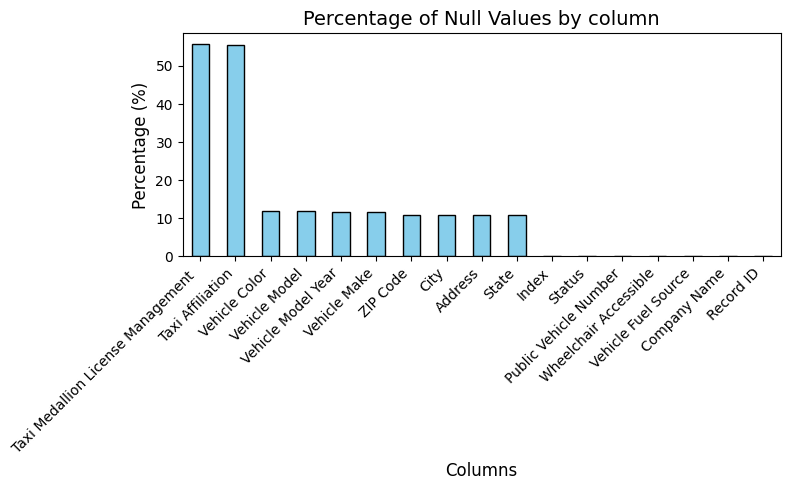

In [13]:
#plot null value percentages
plt.figure(figsize=(8, 5))
missing_percentage.sort_values(ascending=False).plot(kind='bar', color='skyblue',edgecolor='black')
plt.title('Percentage of Null Values by column', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Since there are more than 50% of null values for "Taxi Medallion License Management" and "Taxi Affiliation", those two variables should removed.

In [14]:
#Removing "Taxi Medallion License Management" and "Taxi Affiliation" columns from the dataset

columns_to_drop = ["Taxi Medallion License Management" , "Taxi Affiliation"]
vehicles_df = vehicles_df.drop(columns=columns_to_drop, errors ='ignore')


In [15]:
#save the updated dataframe to a new csv file
vehicles_df.to_csv("updated_combined_vehicles_data.csv", index = False)
print("Updated Dataframe saved to 'updated_combined_vehicles_data.csv',")


Updated Dataframe saved to 'updated_combined_vehicles_data.csv',


In [16]:
#count the number of unique values for each column in the dataframe
vehicles_df.nunique()

Index                                 15667
Public Vehicle Number                 14473
Status                                    8
Vehicle Make                             86
Vehicle Model                           292
Vehicle Model Year                       48
Vehicle Color                            88
Vehicle Fuel Source                       9
Wheelchair Accessible                     2
Company Name                           7494
Address                                2366
City                                     37
State                                     1
ZIP Code                                 92
Taxi Medallion License Management        10
Record ID                             15667
dtype: int64

In [17]:
#count number of null values in the columns of the dataframe
vehicles_df.isnull().sum()

Index                                    0
Public Vehicle Number                    0
Status                                   0
Vehicle Make                          1816
Vehicle Model                         1859
Vehicle Model Year                    1841
Vehicle Color                         1883
Vehicle Fuel Source                      0
Wheelchair Accessible                    0
Company Name                             0
Address                               1694
City                                  1694
State                                 1694
ZIP Code                              1694
Taxi Medallion License Management     8736
Record ID                                0
dtype: int64

Here we are dropping rows where the following columns contain missing values (`NaN`):
- `Address`: Contains 1688 missing values.
- `City`: Contains 1688 missing values.
- `State`: Contains 1688 missing values.
- `ZIP Code`: Contains 1688 missing values.
- `Vehicle Model Year`: Contains 1819 missing values.

These columns are critical for analysis, so rows with incomplete data in these fields are removed.

In [ ]:
vehicles_df.dropna(subset= ['Address','City','State', 'ZIP Code', 'Vehicle Model Year'], inplace = True)

In [ ]:
# Save the cleaned DataFrame to a CSV file
vehicles_df.to_csv("rows_drop_1_vehicles.csv", index=False)

print("Cleaned DataFrame saved to 'rows_drop_1_vehicles.csv'.")
print(vehicles_df)

Cleaned DataFrame saved to 'rows_drop_1_vehicles.csv'.
       Index  Public Vehicle Number     Status Vehicle Make Vehicle Model  \
0       1286                  12009   RESERVED    CHEVROLET       EXPRESS   
1       2095                  12248   INACTIVE     MERCEDES      SPRINTER   
2       7950                  13527   INACTIVE     VAN HOOL         TD925   
4       9359                  13528   INACTIVE     VAN HOOL         TD925   
5       9441                  12025   INACTIVE     MERCEDES      SPRINTER   
...      ...                    ...        ...          ...           ...   
16592  15938                    150     ACTIVE          VIP       CLASSIC   
16594  16033                    166     ACTIVE      MANMADE       CLASSIC   
16597  16143                     42     ACTIVE    PRECISION      6 SEATER   
16599  16216                     70  VIOLATION   MAINSTREET       CLASSIC   
16601  16281                    117     ACTIVE      SCHWINN          NONE   

       Vehicle Model

In [ ]:
#adding a string column indicating the type of the public passenger vehicle(Extracting from the record ID)
vehicles_df['Vehicle Type'] = vehicles_df['Record ID'].str.extract(r'([A-Za-z]+)')
print(vehicles_df)

       Index  Public Vehicle Number     Status Vehicle Make Vehicle Model  \
0       1286                  12009   RESERVED    CHEVROLET       EXPRESS   
1       2095                  12248   INACTIVE     MERCEDES      SPRINTER   
2       7950                  13527   INACTIVE     VAN HOOL         TD925   
4       9359                  13528   INACTIVE     VAN HOOL         TD925   
5       9441                  12025   INACTIVE     MERCEDES      SPRINTER   
...      ...                    ...        ...          ...           ...   
16592  15938                    150     ACTIVE          VIP       CLASSIC   
16594  16033                    166     ACTIVE      MANMADE       CLASSIC   
16597  16143                     42     ACTIVE    PRECISION      6 SEATER   
16599  16216                     70  VIOLATION   MAINSTREET       CLASSIC   
16601  16281                    117     ACTIVE      SCHWINN          NONE   

       Vehicle Model Year Vehicle Color Vehicle Fuel Source  \
0           

In [ ]:
#Drop columns address and public vehicle number
vehicles_df = vehicles_df.drop(columns=['Address','Public Vehicle Number'])

print(vehicles_df)

       Index     Status Vehicle Make Vehicle Model  Vehicle Model Year  \
0       1286   RESERVED    CHEVROLET       EXPRESS              2014.0   
1       2095   INACTIVE     MERCEDES      SPRINTER              2010.0   
2       7950   INACTIVE     VAN HOOL         TD925              2008.0   
4       9359   INACTIVE     VAN HOOL         TD925              2008.0   
5       9441   INACTIVE     MERCEDES      SPRINTER              2015.0   
...      ...        ...          ...           ...                 ...   
16592  15938     ACTIVE          VIP       CLASSIC              2014.0   
16594  16033     ACTIVE      MANMADE       CLASSIC              2018.0   
16597  16143     ACTIVE    PRECISION      6 SEATER              2020.0   
16599  16216  VIOLATION   MAINSTREET       CLASSIC                 0.0   
16601  16281     ACTIVE      SCHWINN          NONE              2014.0   

      Vehicle Color Vehicle Fuel Source Wheelchair Accessible  \
0             BLACK          Bio-Diesel       

In [ ]:
#Identifying missing values after removing records with many null values
missing_percentage = (vehicles_df.isnull().sum() / len(vehicles_df)) * 100

print(missing_percentage)

: 

In [ ]:
#Assign futher missing values as "unknown"
vehicles_df=vehicles_df.fillna("Unknown", inplace="True")
print(vehicles_df)

In [ ]:
# Replace missing values in column "Vehicle Model" with "Unknown"
vehicles_df=vehicles_df['Vehicle_Model'].fillna('Unknown', inplace=True)

#barplot
After sentiment analysis, a higher number of customer reviews for KIA vehicles listed on Edmunds Automotive inventory are positive. All the reviews were categorized as positive and negative. Therefore, the 'error' review is zero.

#review topic pie chart
According to the customer reviews, more reviews talk about the issues, and the percentage is 31.%. Talks about the features of the KIA car model are the
the lowest number of reviews appeared in the reviews dataset.

Electric vehicles are primarily manufactured by Tesla, Mainstreet, Tuk Tuk, and Polaris in Illinois state.
#histogram
From the registered public passenger vehicles in Illinois state, only 5 electric vehicles are manufactured before 2010 and other vehicles are manufactured after 2015